# Titanic_survival_prediction

In [33]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Data Collection

In [2]:
td =pd.read_csv('tested.csv')

In [3]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
td.shape

(418, 12)

In [5]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Returns missing or null values
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

In [7]:
# Drop "Cabin" column from datafram
td = td.drop(columns = 'Cabin', axis = 1)

In [8]:
# to handle missing values in the age and fare column we will replace them with the mean age and fare
Age = td['Age'].mean()
td['Age'].fillna(Age, inplace = True)
Fare = td['Fare'].mean()
td['Fare'].fillna(Fare, inplace = True)
td.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [9]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


## Exploratory Data Analysis

In [10]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# Finding the number of passengers that survived and not survive
# 0 represent not survived
# 1 represents survived
td['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

## Data Visualisation

In [12]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

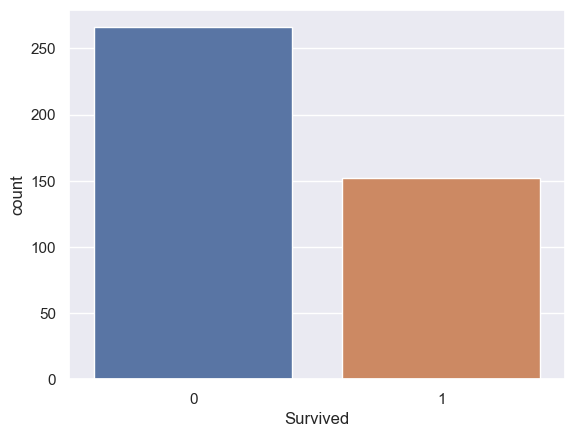

In [13]:
# Making count plot for "Survived" column
sns.countplot(x = 'Survived', data=td)

In [14]:
td['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

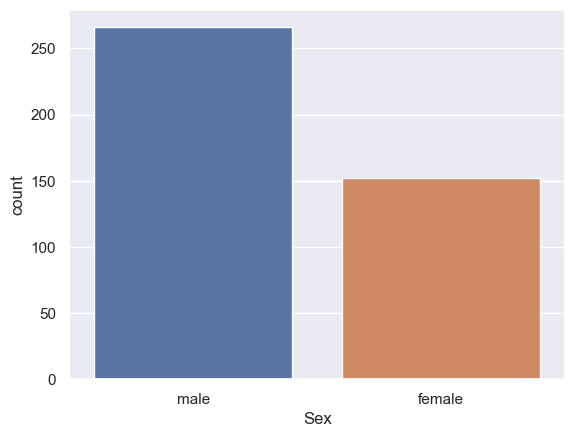

In [15]:
sns.countplot(x = 'Sex', data=td)

In [16]:
td['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [20]:
td['Survived_str'] = td.Survived.apply(str)

<Axes: xlabel='Sex', ylabel='count'>

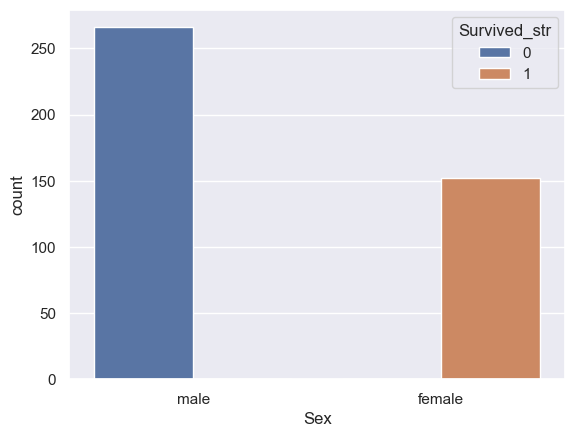

In [21]:
# Number of passengers survived "Gender" wise
sns.countplot(x = 'Sex', hue = 'Survived_str', data=td)

####  Those who survived were only females

<Axes: xlabel='Pclass', ylabel='count'>

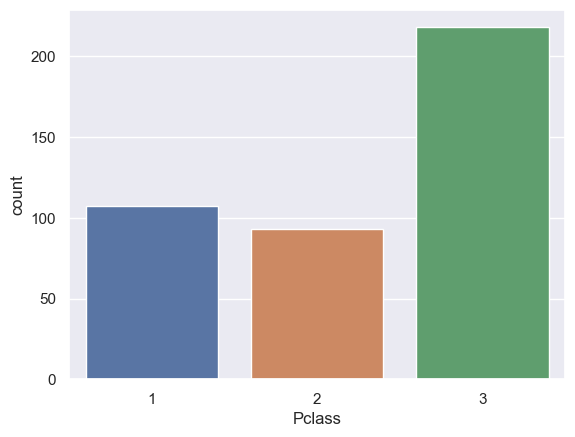

In [17]:
# Plotting "Pclass"
sns.countplot(x = 'Pclass', data=td)


<Axes: xlabel='Pclass', ylabel='count'>

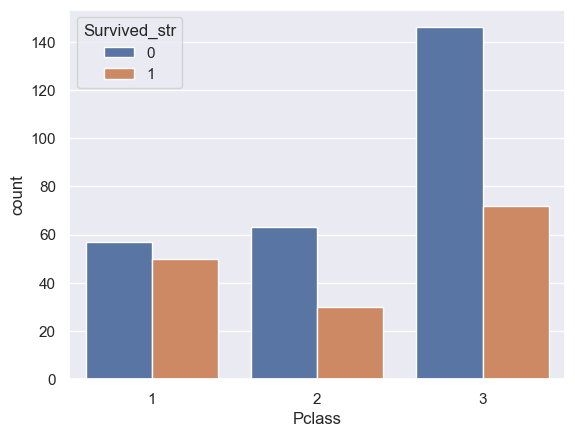

In [22]:
# Plotting "Pclass" with "Survived" column
sns.countplot(x = 'Pclass',hue = 'Survived_str', data=td)

## Encoding the Categorical Column

In [24]:
td['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [25]:
td['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [26]:
# Converting Categorical values
# 0 will represent Male and 1 will represent Female
# 0 represent S, 1 C class and 2 Q class

td.replace({'Sex':{'male' : 0 , 'female' : 1} ,  'Embarked':{'S' : 0, 'C' : 1 , 'Q' : 2}}, inplace = True)
     

td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_str
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


### Seperation Features and Target

In [49]:

# Drop certain column
X = td.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived','Survived_str'], axis = 1)
Y = td['Survived']
     

print(X)

print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [51]:
td.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Survived_str    0
dtype: int64

## Splitting Data into Training and Test Data

In [52]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Model Training

In [31]:
model = LogisticRegression()

In [53]:
model.fit(X_train,Y_train)


LogisticRegression()

## Model Evaluation

In [54]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)
     

[1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 0]


In [55]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy Score of Traning Data: ',training_data_accuracy)

Accuracy Score of Traning Data:  1.0


In [56]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
     

print(X_test_prediction)

[0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0]


In [57]:
training_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy Score of Test Data: ',training_data_accuracy)

Accuracy Score of Test Data:  1.0


In [58]:
# precision score
test_data_precision = precision_score(Y_test, X_test_prediction)
print('test data precion is :', test_data_precision)


test data precion is : 1.0


In [59]:
# recall score
test_data_recall = recall_score(Y_train, X_train_prediction)
print('test data recall is :', test_data_recall)

test data recall is : 1.0


In [60]:
# recall score
test_data_recall = recall_score(Y_train, X_train_prediction)
print('test data recall is :', test_data_recall)

test data recall is : 1.0


In [42]:
from sklearn import metrics

In [61]:
score = model.score(X_test,Y_test)
print(score)

1.0


In [62]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[214   0]
 [  0 120]]


Text(0.5, 1.0, "('Accuracy Score :', 1.0)")

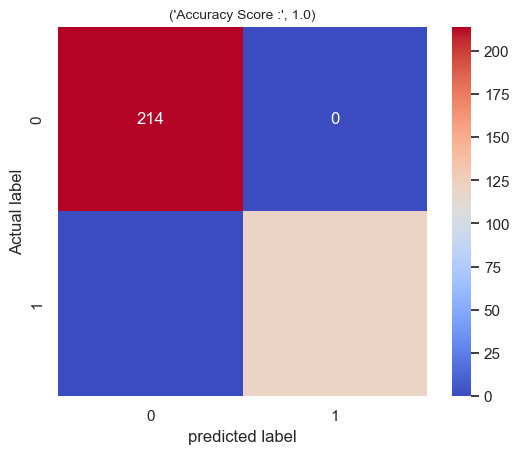

In [63]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "coolwarm")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)


In [65]:
classification_report(X_test_prediction, Y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        52\n           1       1.00      1.00      1.00        32\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'